# Car_Price A1 Assignment

This dataset is a classification problem, predicting Car Price

# Task 1

## 1. Import Library 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.0.2', '2.2.3', '0.13.2', '3.9.4')

## 2. Load Data

In [3]:
#Load Data
df = pd.read_csv('Cars.csv')

In [4]:
#print the first rows of the data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
#Checking shape of the data
df.shape

(8128, 13)

In [6]:
#Statiscal Info of the data
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
#Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
#Check column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## 3. Exploratory Data Analysis (EDA)

Inspecting data to better understand the nature of the given data

In [9]:
#Check column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [10]:
#renaming column 'name' to 'brand'
df.rename(columns= {
    'name': 'brand'}, inplace= True)

df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

### Univariate analyis

Single variable exploratory data anlaysis

#### Count Plot

<Axes: xlabel='owner', ylabel='count'>

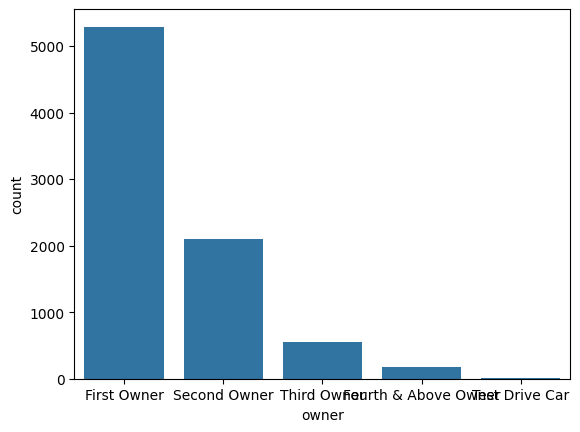

In [11]:
sns.countplot(data = df, x = 'owner')

#### Dis Plot

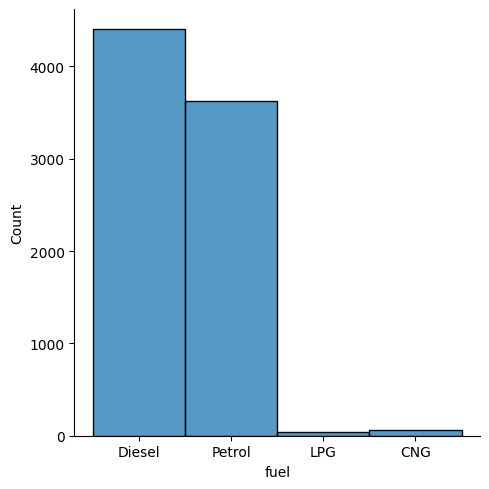

In [12]:
sns.displot(data = df, x = 'fuel')

### Multivariate analysis

Multiple variable exploratory data anlaysis

#### Box Plot

Text(0.5, 0, 'Fuel Type')

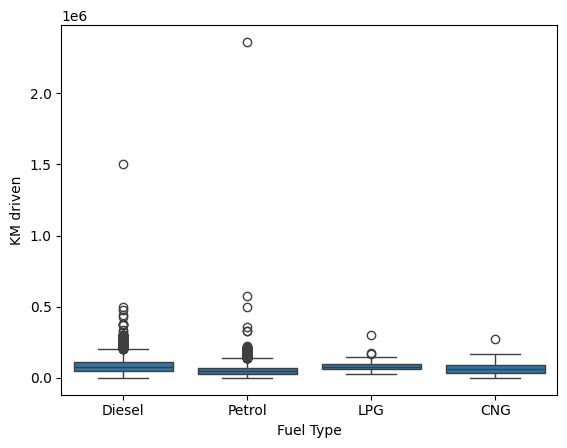

In [13]:
sns.boxplot(x = df["fuel"], y = df["km_driven"]);
plt.ylabel("KM driven")
plt.xlabel("Fuel Type")

sns.boxplot(x = df["engine"], y = df["mileage"]);
plt.ylabel("Driven in KM")
plt.xlabel("Fuel Type")

#### Scatter Plot

<Axes: xlabel='year', ylabel='selling_price'>

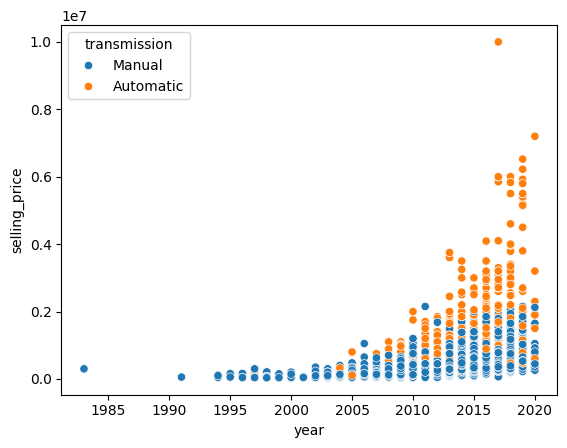

In [14]:
sns.scatterplot(x = df['year'], y = df['selling_price'], hue=df['transmission'])

#### Bar Sub Plot

In [15]:
df.dtypes
num_col = df.select_dtypes(include=['int64', 'float64'])
# numcol = numcol.drop([]) #Loan_Status
cat_col = df.select_dtypes(exclude=['int64', 'float64'])
num_col.columns, cat_col.columns

(Index(['year', 'selling_price', 'km_driven', 'seats'], dtype='object'),
 Index(['brand', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage',
        'engine', 'max_power', 'torque'],
       dtype='object'))

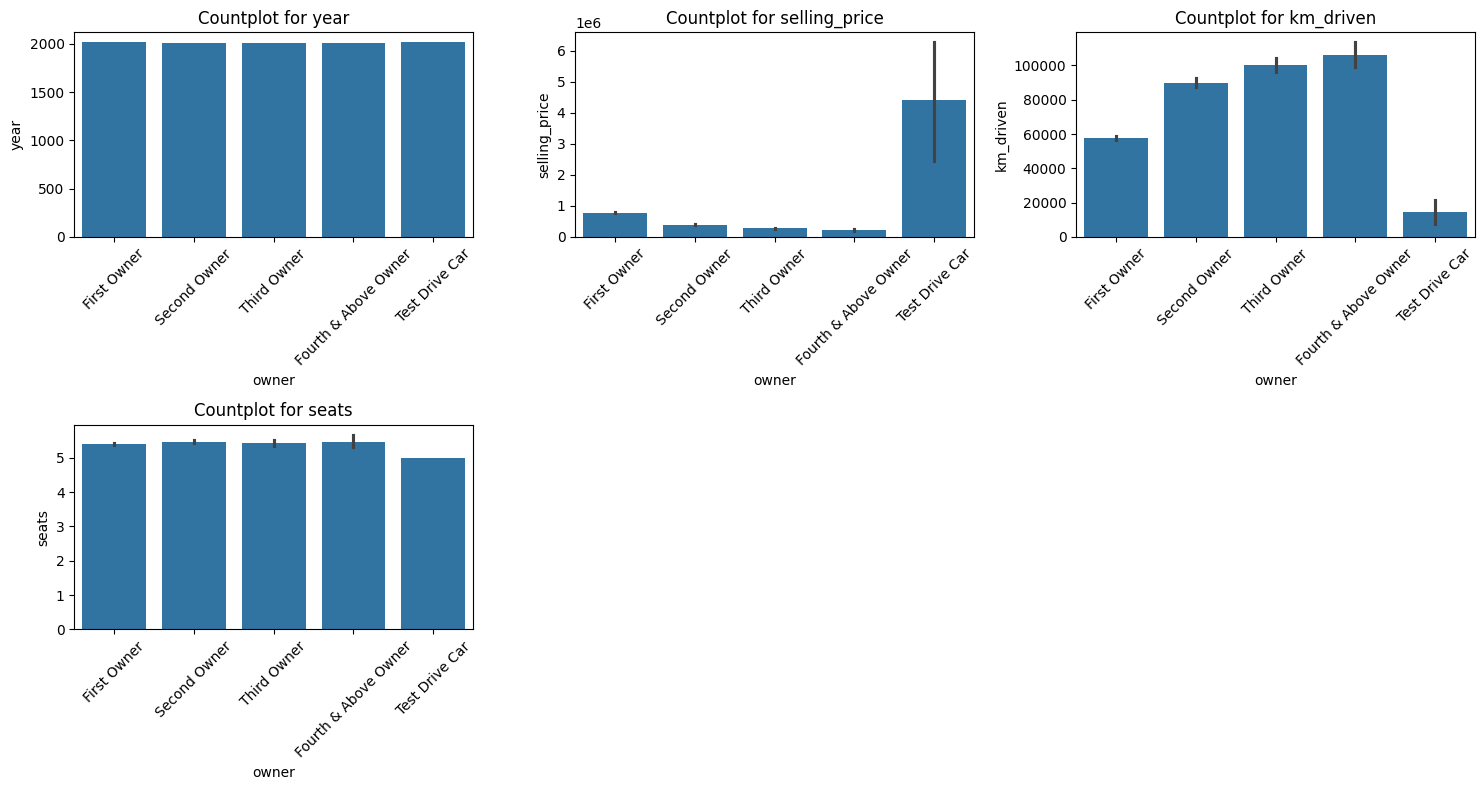

In [16]:
# Number of categorical columns
num_cols = len(num_col.columns)

# Set up the subplot grid dimensions
rows = (num_cols + 2) // 3  #
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4)) 
axes = axes.flatten()  

# Iterate through the categorical columns and plot countplots
for i, col in enumerate(num_col.columns):
    sns.barplot(x = df['owner'], y = df[col],ax=axes[i])

    axes[i].set_title(f'Countplot for {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Remove unused subplot spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

#### Histogram Sub plot

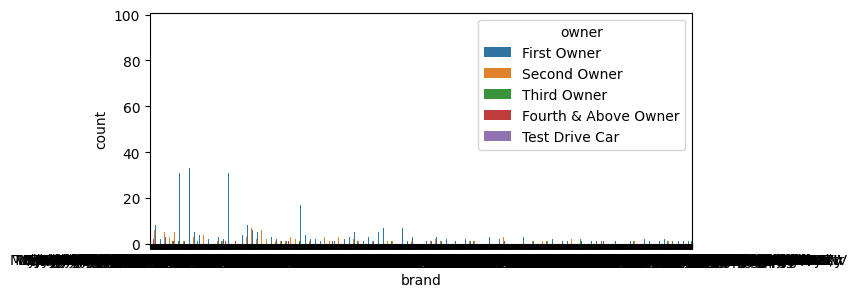

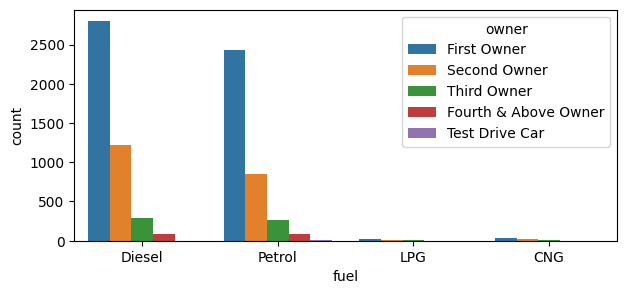

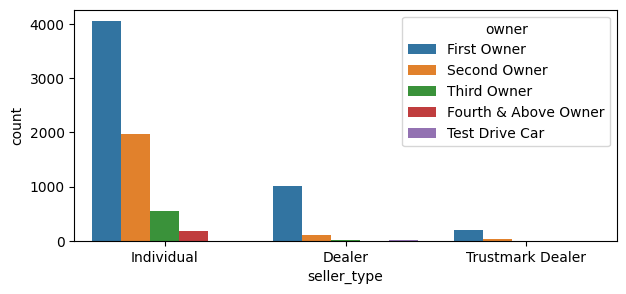

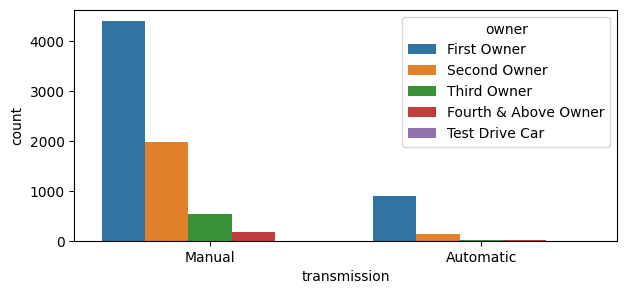

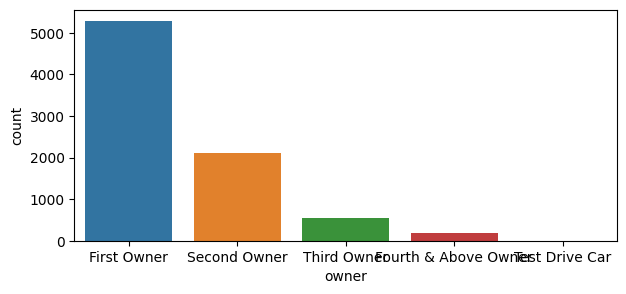

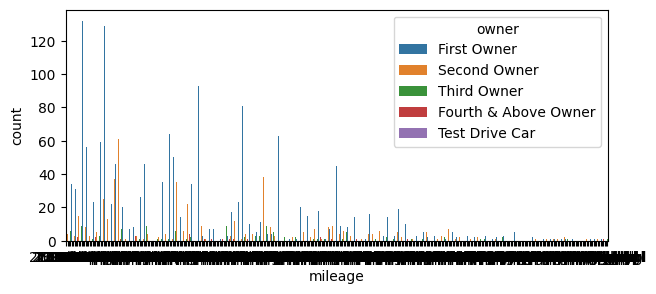

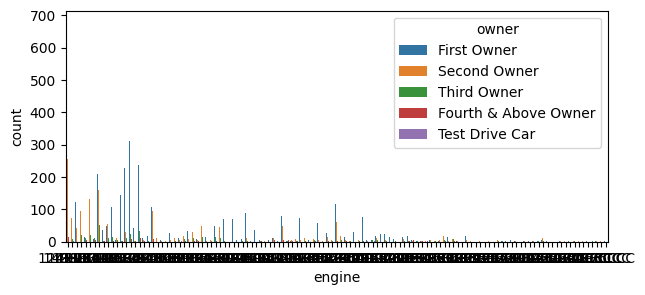

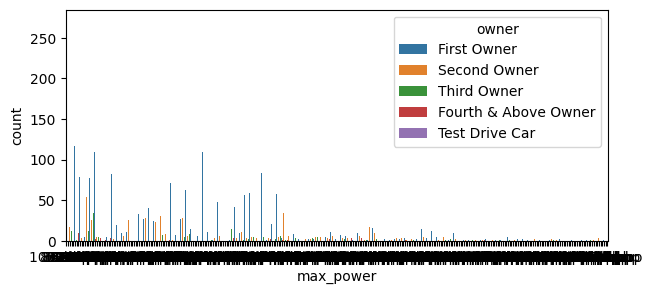

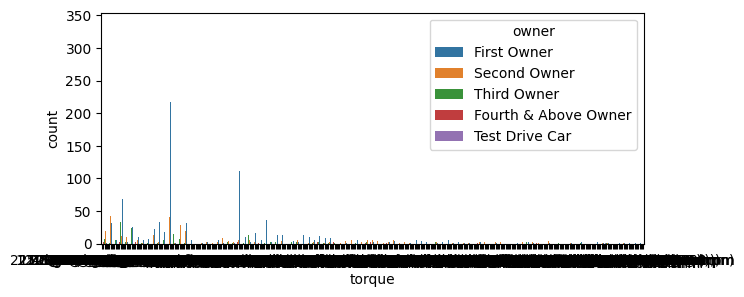

In [17]:
for col in cat_col.columns:
    plt.figure(figsize=(7, 3))
    sns.countplot(x = df[col], hue = df['owner'])
    #similar to hue in scatterplot
    plt.show()

## 4. Data Preparation

In [18]:
#Mapping Owner

#check for unique owner
df["owner"].unique()

#mapping owner
mapping = {'First Owner' : 1,
           'Second Owner': 2,
           'Third Owner': 3,
           'Fourth & Above Owner': 4,
           'Test Drive Car': 5
           }

df['owner'] = df['owner'].map(mapping)

#Final Check
df["owner"].unique()



array([1, 2, 3, 4, 5])

In [19]:
#removing all rows with CNG and LPG from fuel colums
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

In [20]:
#removing "kmpl" from mileague columns
df['mileage'] = df['mileage'].str.split(' ').str[0].astype(float)

In [21]:
#removing "CC" from engine columns

df['engine'] = df['engine'].str.replace('CC', '').astype(float)

In [22]:
#Removing "bhp" from Max Power columns
df['max_power'] = df['max_power'].str.replace('bhp', '').astype(float)

In [23]:
#Removing other word except the first word in brand columns
df['brand'] = df['brand'].str.split(' ').str[0]

In [24]:
#Drop "Torque" columns
df = df.drop(columns=['torque'])

In [25]:
#Removing all "Test Drive Car" from owner columns
df = df[df['owner'] != 5]

In [26]:
#Performing Log Transform
y = np.log(df['selling_price'])

In [27]:
#Final Table after cleaning
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


### Chaning string in dataset into number 

In [28]:
#Group different Car Brand by Region

brand_groups = {
    'Asian': [
        'Maruti', 'Tata', 'Mahindra', 'Force', 'Ambassador', 'Ashok',  # India
        'Honda', 'Toyota', 'Mitsubishi', 'Nissan', 'Lexus', 'Isuzu', 'Datsun',  # Japan
        'Hyundai', 'Daewoo', 'Kia'  # South Korea
    ],
    'European': [
        'Renault', 'Peugeot',  # France
        'Skoda',  # Czech Republic
        'Fiat',  # Italy
        'Mercedes-Benz', 'Audi', 'Volkswagen', 'BMW', 'Opel',  # Germany
        'Jaguar', 'Land', 'MG',  # UK
        'Volvo'  # Sweden
    ],
    'USA': [
        'Ford', 'Chevrolet', 'Jeep'  # USA
    ]
}

# Map each brand to its own group
def map_group(brand):
    for group, brands in brand_groups.items():
        if brand in brands:
            return group
    return 'Unknown'

df['group'] = df['brand'].apply(map_group)

#create one hot encoding
df['brand_Asian'] = (df['group'] == 'Asian').astype(int)
df['brand_European'] = (df['group'] == 'European').astype(int)
df['brand_USA'] = (df['group'] == 'USA').astype(int)

#drop group columns
df = df.drop(columns=['group'])

#drop brand columns
df = df.drop(columns=['brand'])


In [29]:
from sklearn.preprocessing import LabelEncoder

#do label encoding for fuel
le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])



In [30]:
#do label encoding for transmission
le = LabelEncoder()
df['transmission'] = le.fit_transform(df['transmission'])

In [31]:
# Create one-hot encoding for 'seller_type'
df['seller_type_Individual'] = (df['seller_type'] == 'Individual').astype(int)
df['seller_type_Dealer'] = (df['seller_type'] == 'Dealer').astype(int)
df['seller_type_Trustmark_Dealer'] = (df['seller_type'] == 'Trustmark Dealer').astype(int)

# Drop the original 'seller_type' column if it's no longer needed
df = df.drop(columns=['seller_type'])

In [32]:
#Convert selling_price columns into discrete variable 

# Define the bins and corresponding labels
bins = [0, 150000, 250000, 350000, float('inf')]
labels = [0, 1, 2, 3]

# Create a new column 'selling_price_class' with the binned values
df['selling_price_class'] = pd.cut(df['selling_price'], 
                                   bins=bins, 
                                   labels=labels)

In [33]:
display(df)

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,brand_Asian,brand_European,brand_USA,seller_type_Individual,seller_type_Dealer,seller_type_Trustmark_Dealer,selling_price_class
0,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0,1,0,0,1,0,0,3
1,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0,0,1,0,1,0,0,3
2,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0,1,0,0,1,0,0,1
3,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0,1,0,0,1,0,0,1
4,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,1,1,1,18.50,1197.0,82.85,5.0,1,0,0,1,0,0,2
8124,2007,135000,119000,0,1,4,16.80,1493.0,110.00,5.0,1,0,0,1,0,0,0
8125,2009,382000,120000,0,1,1,19.30,1248.0,73.90,5.0,1,0,0,1,0,0,3
8126,2013,290000,25000,0,1,1,23.57,1396.0,70.00,5.0,1,0,0,1,0,0,2


## 5. Correlation (Heat Map)

<Axes: >

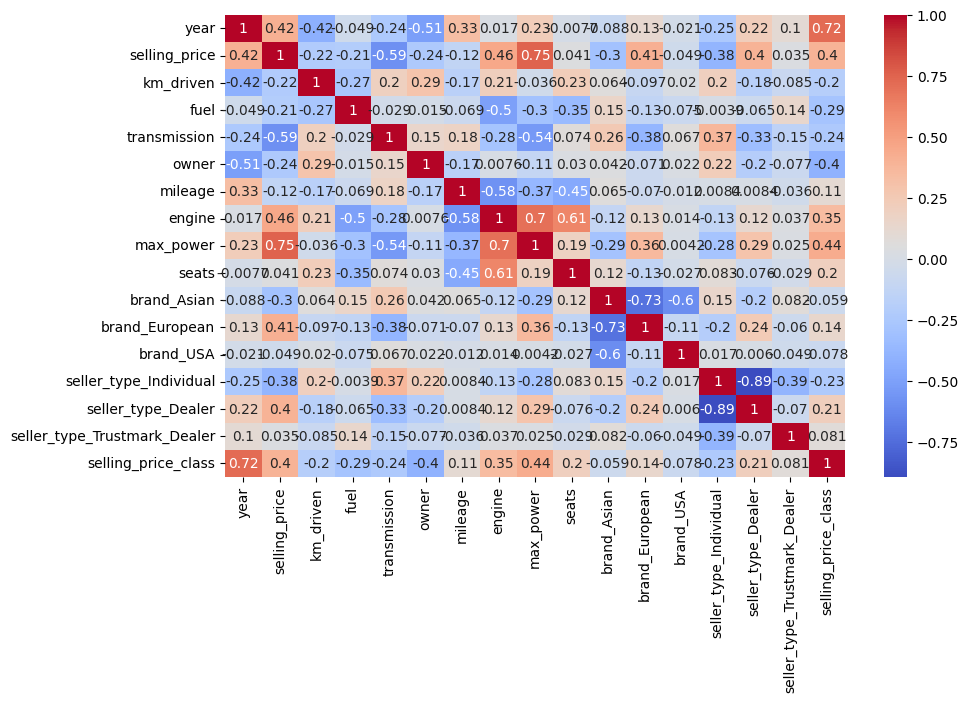

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm')

In [35]:
#Dropping seat columns because there are not much effect to it according to the heat map correlation

df = df.drop('seats', axis='columns')

## 6. Processing

#### Null Value

In [36]:
#check the missing value in df data set
df.isna().sum()

year                              0
selling_price                     0
km_driven                         0
fuel                              0
transmission                      0
owner                             0
mileage                         214
engine                          214
max_power                       208
brand_Asian                       0
brand_European                    0
brand_USA                         0
seller_type_Individual            0
seller_type_Dealer                0
seller_type_Trustmark_Dealer      0
selling_price_class               0
dtype: int64

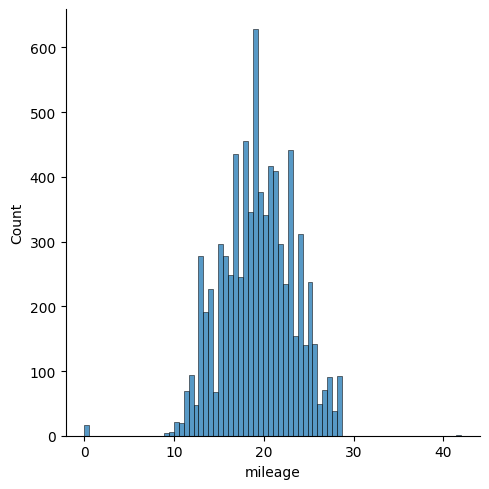

In [37]:
sns.displot(df.mileage)

In [38]:
#Fill out mileage with mean

df['mileage'].fillna(df['mileage'].mean(), inplace=True)

/var/folders/55/sf5l4l957zlg5xqxmtw1xg9c0000gn/T/ipykernel_35299/2088284964.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage'].fillna(df['mileage'].mean(), inplace=True)


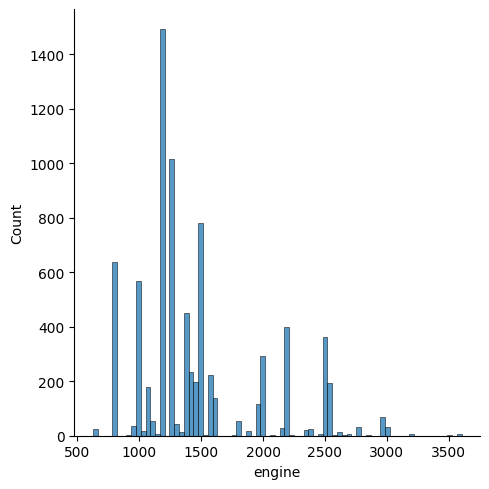

In [39]:
sns.displot(df.engine)

In [40]:
#Fill out engine with median

df['engine'].fillna(df['engine'].median(), inplace=True)

/var/folders/55/sf5l4l957zlg5xqxmtw1xg9c0000gn/T/ipykernel_35299/2990182329.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engine'].fillna(df['engine'].median(), inplace=True)


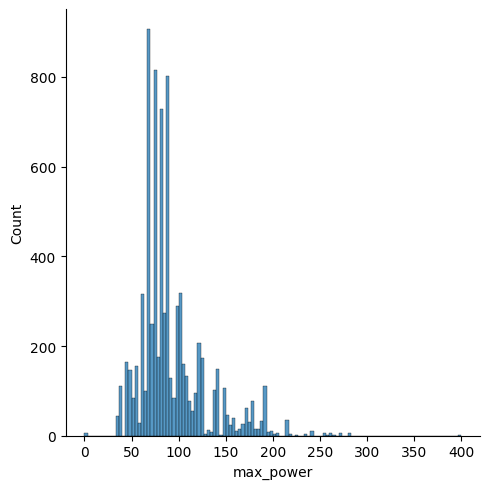

In [41]:
sns.displot(df.max_power)

In [42]:
#Fill out max_power with median

df['max_power'].fillna(df['max_power'].median(), inplace=True)

/var/folders/55/sf5l4l957zlg5xqxmtw1xg9c0000gn/T/ipykernel_35299/1770132938.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['max_power'].fillna(df['max_power'].median(), inplace=True)


## 7. Modeling

In [43]:
import ssl
import certifi

ssl._create_default_https_context = ssl._create_unverified_context


In [44]:
#experiment tracking
import mlflow
import os
import requests
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th/")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "jirapon"
os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
# Define username and password
# username = "admin"
# password = "password"

# Authenticate with MLflow
# mlflow.get_tracking_uri()
# session = requests.Session()
# session.auth = (username, password)
mlflow.set_experiment(experiment_name="st124856-a3")

<Experiment: artifact_location='mlflow-artifacts:/157813570465576009', creation_time=1741789387626, experiment_id='157813570465576009', last_update_time=1741789387626, lifecycle_stage='active', name='st124856-a3', tags={}>

In [45]:
#Identify x
X = df[['year','km_driven','mileage','brand_USA','brand_European','brand_Asian']]

#Identify y
# Y = df['selling_price']
Y = pd.cut(df['selling_price'], bins=4, labels=[0, 1, 2, 3])
# Y = df['selling_price_class']

### Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

# Check if X contain (samples, features), and y contain (samples, )
assert X_train.ndim == 2
assert X_test.ndim  == 2
assert y_train.ndim == 1


# Check the shapes of the resulting datasets
print("Training features shape: ", X_train.shape) #% of the rows, # of features
print("Testing features shape: ", X_test.shape)
print("Training target shape: ", y_train.shape)
print("Testing target shape: ", y_test.shape)

Training features shape:  (6422, 6)
Testing features shape:  (1606, 6)
Training target shape:  (6422,)
Testing target shape:  (1606,)


In [47]:
#Convert Data to Numpy Arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train) 
y_test = np.array(y_test)  

In [48]:
from sklearn.preprocessing import StandardScaler
# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1) 
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1) #add intercept

## 8. Testing

In [50]:
# Convert continuous price into categories (4 bins)
y_train = pd.cut(y_train, bins=4, labels=[0, 1, 2, 3]).astype(int)
y_test = pd.cut(y_test, bins=4, labels=[0, 1, 2, 3]).astype(int)

# Correct one-hot encoding
k = len(np.unique(y_train))  # Should now be 4
m = X_train.shape[0]  # Number of samples

Y_train_encoded = np.zeros((m, k))
for i, label in enumerate(y_train):
    Y_train_encoded[i, label] = 1  # Corrected indexing


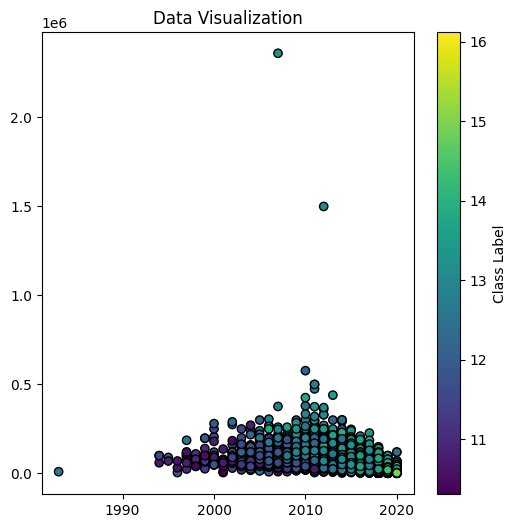

In [51]:
X = np.array(X)  # Ensure it's a NumPy array
y = np.array(y).flatten() 

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')  # Fixes applied
plt.colorbar(label='Class Label')  # Show class color mapping
plt.title("Data Visualization")
plt.show()

### Classification

In [52]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

class LogisticRegression:
    
    def __init__(self, k, n, method="batch", alpha=0.003, max_iter=5000, class_weights=None):
        self.k = k  # Number of classes
        self.n = n  # Number of features + intercept
        self.alpha = alpha  # Learning rate
        self.max_iter = max_iter  # Number of iterations
        self.method = method  # Optimization method
        self.class_weights = class_weights  # Class weights for handling imbalance

    def fit(self, X, Y):
        self.W = np.random.randn(self.n, self.k) * 0.05  # Initialize weights with small random values
        self.losses = []
        self.velocity = np.zeros_like(self.W)  # Initialize momentum term
        beta = 0.9  # Momentum factor
        
        start_time = time.time()
        for i in range(self.max_iter):
            loss, grad = self.gradient(X, Y)
            
            # Clip gradients to prevent explosion
            grad = np.clip(grad, -1, 1)

            self.losses.append(loss)
            # self.W -= self.alpha * grad  # Gradient descent update
            self.velocity = beta * self.velocity + (1 - beta) * grad  # Momentum update
            self.W -= self.alpha * self.velocity  # Update weights

            # Print progress every 500 iterations
            if i % 500 == 0:
                print(f"Loss at iteration {i}: {loss:.4f}")
                print("Gradient norm:", np.linalg.norm(grad))

        print(f"Training time: {time.time() - start_time:.2f} seconds")


    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)  # Compute softmax probabilities

        # Apply class weights if provided
        if self.class_weights:
            weight_matrix = np.array([self.class_weights.get(c, 1) for c in range(self.k)])
            weighted_Y = Y * weight_matrix  # Apply weights
        else:
            weighted_Y = Y

        # Compute weighted cross-entropy loss
        loss = -np.sum(weighted_Y * np.log(np.clip(h, 1e-9, 1))) / m
        error = h - Y  # Compute error
        grad = self.softmax_grad(X, error)  # Compute gradient
        return loss, grad

    def softmax(self, theta_t_x):
        """ Numerically stable softmax function """
        theta_t_x = np.clip(theta_t_x, -500, 500)  # Prevent overflow
        exp_vals = np.exp(theta_t_x - np.max(theta_t_x, axis=1, keepdims=True))
        sum_exp_vals = np.sum(exp_vals, axis=1, keepdims=True) + 1e-9  # Prevent division by zero
        return exp_vals / sum_exp_vals  # Compute softmax probabilities

    def softmax_grad(self, X, error):
        return X.T @ error  # Compute gradient

    def h_theta(self, X, W):
        """ Compute probability predictions """
        return self.softmax(X @ W)

    def predict(self, X_test):
        """ Return class predictions """
        return np.argmax(self.h_theta(X_test, self.W), axis=1)

    def accuracy(self, X_test, y_true):
        """ Compute accuracy """
        y_pred = self.predict(X_test)
        accuracy_score = np.mean(y_pred == y_true)
        return accuracy_score

    def plot(self):
        """ Plot loss over iterations """
        plt.plot(np.arange(len(self.losses)), self.losses, label="Training Loss")
        plt.title("Loss over Iterations")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

#### Running Algorithm

Loss at iteration 0: 1.3648
Gradient norm: 5.291502622129181
Loss at iteration 500: 0.9167
Gradient norm: 2.7916562429668303
Loss at iteration 1000: 0.7447
Gradient norm: 2.5851571411635494
Loss at iteration 1500: 0.6712
Gradient norm: 2.727118038962276
Loss at iteration 2000: 0.6441
Gradient norm: 2.5856162895696193
Loss at iteration 2500: 0.6350
Gradient norm: 2.6424570555832467
Loss at iteration 3000: 0.6309
Gradient norm: 2.1406352982858015
Loss at iteration 3500: 0.6291
Gradient norm: 2.203427241174328
Loss at iteration 4000: 0.6287
Gradient norm: 0.2906229484387009
Loss at iteration 4500: 0.6287
Gradient norm: 0.008232381386882197
Training time: 2.42 seconds
Model Accuracy: 0.6569


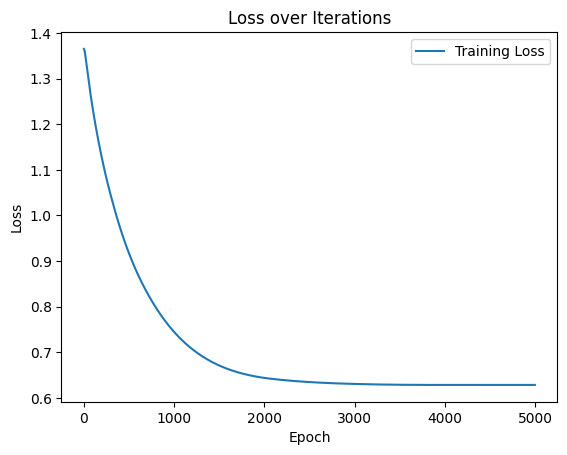

========= Classification Report =======
              precision    recall  f1-score   support

           0       0.55      0.39      0.45        75
           1       0.57      0.84      0.68       617
           2       0.78      0.57      0.66       810
           3       0.82      0.48      0.61       104

    accuracy                           0.66      1606
   macro avg       0.68      0.57      0.60      1606
weighted avg       0.69      0.66      0.65      1606



In [53]:
# Initialize and train the model
class_model = LogisticRegression(k=k, n=X_train.shape[1], method="minibatch", alpha=0.001, max_iter=5000)
class_model.fit(X_train, Y_train_encoded)

# Predictions
yhat = class_model.predict(X_test)

# Compute accuracy
accuracy = class_model.accuracy(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f}")

# Plot loss curve
class_model.plot()

# Generate classification report
from sklearn.metrics import classification_report
print("========= Classification Report =======")
print(classification_report(y_test, yhat))


In [54]:
#Ensure that the model actually learn
print("Y_train_encoded shape:", Y_train_encoded.shape)  # Should be (m, k)
print("First few Y_train_encoded rows:\n", Y_train_encoded[:5])


Y_train_encoded shape: (6422, 4)
First few Y_train_encoded rows:
 [[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


#### Compute Macro Precision, Macro Recall, and Macro F1 in Python

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score

def compute_macro_metrics(y_true, y_pred):
    macro_precision = precision_score(y_true, y_pred, average="macro")
    macro_recall = recall_score(y_true, y_pred, average="macro")
    macro_f1 = f1_score(y_true, y_pred, average="macro")
    
    print(f"Macro Precision: {macro_precision:.4f}")
    print(f"Macro Recall: {macro_recall:.4f}")
    print(f"Macro F1-score: {macro_f1:.4f}")
    
    return macro_precision, macro_recall, macro_f1

# Example usage:
macro_precision, macro_recall, macro_f1 = compute_macro_metrics(y_test, yhat)


Macro Precision: 0.6803
Macro Recall: 0.5679
Macro F1-score: 0.5990


#### Compute Weighted Precision, Weighted Recall, and Weighted F1 in Python

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score

def compute_weighted_metrics(y_true, y_pred):
    weighted_precision = precision_score(y_true, y_pred, average="weighted")
    weighted_recall = recall_score(y_true, y_pred, average="weighted")
    weighted_f1 = f1_score(y_true, y_pred, average="weighted")
    
    print(f"Weighted Precision: {weighted_precision:.4f}")
    print(f"Weighted Recall: {weighted_recall:.4f}")
    print(f"Weighted F1-score: {weighted_f1:.4f}")
    
    return weighted_precision, weighted_recall, weighted_f1

# Example usage:
weighted_precision, weighted_recall, weighted_f1 = compute_weighted_metrics(y_test, yhat)


Weighted Precision: 0.6934
Weighted Recall: 0.6569
Weighted F1-score: 0.6531


#### Compare Your Implementation with classification_report in Scikit-Learn

##### Create Mock Data

In [57]:
import numpy as np
from sklearn.metrics import classification_report

# Generate mock data (10 samples, 4 classes)
np.random.seed(42)
y_true = np.random.randint(0, 4, 10)  # True labels (random 0-3)
y_pred = np.random.randint(0, 4, 10)  # Predicted labels (random 0-3)

print("True labels:", y_true)
print("Predicted labels:", y_pred)


True labels: [2 3 0 2 2 3 0 0 2 1]
Predicted labels: [2 2 2 2 3 0 3 3 3 2]


#####  Compute Precision, Recall, and F1 

In [58]:
def manual_macro_metrics(y_true, y_pred):
    from sklearn.metrics import precision_score, recall_score, f1_score
    import numpy as np

    # Compute precision, recall, and F1-score per class
    per_class_precision = precision_score(y_true, y_pred, average=None)
    per_class_recall = recall_score(y_true, y_pred, average=None)
    per_class_f1 = f1_score(y_true, y_pred, average=None)

    # Macro averaging: mean of all class scores
    macro_precision = np.mean(per_class_precision)
    macro_recall = np.mean(per_class_recall)
    macro_f1 = np.mean(per_class_f1)
    
    print("\n===== Manual Computation =====")
    print(f"Macro Precision: {macro_precision:.4f}")
    print(f"Macro Recall: {macro_recall:.4f}")
    print(f"Macro F1-score: {macro_f1:.4f}")

    return macro_precision, macro_recall, macro_f1

manual_macro_metrics(y_true, y_pred)



===== Manual Computation =====
Macro Precision: 0.1000
Macro Recall: 0.1250
Macro F1-score: 0.1111


/Users/jiraponkluaymaingarm/Desktop/AIT Class/Term January 2025/Machine Learning/Github Assignment/A3_Car Prices/CarPrice3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(np.float64(0.1), np.float64(0.125), np.float64(0.1111111111111111))

##### Compare with classification_report

In [59]:
print("\n===== Scikit-Learn Classification Report =====")
print(classification_report(y_true, y_pred, digits=4))



===== Scikit-Learn Classification Report =====
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         3
           1     0.0000    0.0000    0.0000         1
           2     0.4000    0.5000    0.4444         4
           3     0.0000    0.0000    0.0000         2

    accuracy                         0.2000        10
   macro avg     0.1000    0.1250    0.1111        10
weighted avg     0.1600    0.2000    0.1778        10



/Users/jiraponkluaymaingarm/Desktop/AIT Class/Term January 2025/Machine Learning/Github Assignment/A3_Car Prices/CarPrice3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jiraponkluaymaingarm/Desktop/AIT Class/Term January 2025/Machine Learning/Github Assignment/A3_Car Prices/CarPrice3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jiraponkluaymaingarm/Desktop/AIT Class/Term January 2025/Machine Learning/Github Assignment/A3_Car Prices/CarPrice3/lib/python3.9/site-pa

##### What Does "Support" Mean in the Classification Report?

Answer: 

Support represents the number of actual occurrences of each class in the dataset (y_true). It helps detect class imbalance (e.g., when some classes appear more frequently than others) and indicates whether a class has enough samples for meaningful evaluation. If support is too low, metrics like precision and recall may be unreliable.

In [60]:
# Start MLflow Run
with mlflow.start_run():
    mlflow.log_param("model_type", "Classification")
    
    # Log model ONLY, without dataset
    mlflow.sklearn.log_model(class_model, "classification_model")
    
    # Save model locally
    mlflow.sklearn.save_model(class_model, "classification_saved_model2")

print("Model saved successfully!")

2025/03/12 22:21:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run fearless-kit-392 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/157813570465576009/runs/7c823d913d0740529a9a671ee9fce4b0
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/157813570465576009
Model saved successfully!


### Ridge Logistic Regression

In [61]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

class LogisticRegression:
    
    def __init__(self, k, n, method="batch", alpha=0.001, max_iter=5000, lambda_=0.0):
        """
        k: Number of classes
        n: Number of features + intercept
        method: "batch" or "minibatch"
        alpha: Learning rate
        max_iter: Maximum number of iterations
        lambda_: L2 regularization strength (0 means no regularization)
        """
        self.k = k  
        self.n = n  
        self.alpha = alpha  
        self.max_iter = max_iter  
        self.method = method  
        self.lambda_ = lambda_  # Regularization strength (0 means no L2 regularization)

    def fit(self, X, Y):
        self.W = np.random.randn(self.n, self.k) * 0.05  # Initialize weights
        self.losses = []

        start_time = time.time()
        for i in range(self.max_iter):
            loss, grad = self.gradient(X, Y)
            
            # Apply L2 regularization to weight updates (excluding bias term)
            grad[1:, :] += 2 * self.lambda_ * self.W[1:, :]

            self.losses.append(loss)
            self.W -= self.alpha * grad  

            # Print progress every 500 iterations
            if i % 500 == 0:
                print(f"Loss at iteration {i}: {loss:.4f}")

        print(f"Training time: {time.time() - start_time:.2f} seconds")

    def gradient(self, X, Y):
        """ Compute loss and gradient with optional L2 regularization """
        m = X.shape[0]
        h = self.h_theta(X, self.W)  # Compute softmax probabilities

        # Compute loss with L2 penalty if lambda_ > 0
        loss = -np.sum(Y * np.log(np.clip(h, 1e-9, 1))) / m  
        if self.lambda_ > 0:
            loss += self.lambda_ * np.sum(self.W[1:, :] ** 2)  # Exclude bias from L2 penalty

        # Compute gradient
        error = h - Y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        """ Numerically stable softmax function """
        theta_t_x = np.clip(theta_t_x, -500, 500)  # Prevent overflow
        exp_vals = np.exp(theta_t_x - np.max(theta_t_x, axis=1, keepdims=True))
        sum_exp_vals = np.sum(exp_vals, axis=1, keepdims=True) + 1e-9  # Prevent division by zero
        return exp_vals / sum_exp_vals  

    def softmax_grad(self, X, error):
        return X.T @ error  # Compute gradient

    def h_theta(self, X, W):
        """ Compute probability predictions """
        return self.softmax(X @ W)

    def predict(self, X_test):
        """ Return class predictions """
        return np.argmax(self.h_theta(X_test, self.W), axis=1)

    def accuracy(self, X_test, y_true):
        """ Compute accuracy """
        y_pred = self.predict(X_test)
        accuracy_score = np.mean(y_pred == y_true)
        return accuracy_score

    def plot(self):
        """ Plot loss over iterations """
        plt.plot(np.arange(len(self.losses)), self.losses, label="Training Loss")
        plt.title("Loss over Iterations")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()


In [62]:
# ✅ Train Model WITHOUT Regularization (Standard Logistic Regression)
model = LogisticRegression(k=k, n=X_train.shape[1], method="minibatch", alpha=0.0001, max_iter=5000, lambda_=0.0)
model.fit(X_train, Y_train_encoded)

print("-----------------Penalty (lambda) is applied-----------------")

# ✅ Train Model WITH Ridge Regularization (L2 Regularization Applied)
ridge_model = LogisticRegression(k=k, n=X_train.shape[1], method="minibatch", alpha=0.0001, max_iter=5000, lambda_=0.001)
ridge_model.fit(X_train, Y_train_encoded)



Loss at iteration 0: 1.3712
Loss at iteration 500: 0.6332
Loss at iteration 1000: 0.6303
Loss at iteration 1500: 0.6294
Loss at iteration 2000: 0.6290
Loss at iteration 2500: 0.6289
Loss at iteration 3000: 0.6288
Loss at iteration 3500: 0.6288
Loss at iteration 4000: 0.6288
Loss at iteration 4500: 0.6288
Training time: 2.53 seconds
-----------------Penalty (lambda) is applied-----------------
Loss at iteration 0: 1.4391
Loss at iteration 500: 0.6525
Loss at iteration 1000: 0.6541
Loss at iteration 1500: 0.6559
Loss at iteration 2000: 0.6575
Loss at iteration 2500: 0.6587
Loss at iteration 3000: 0.6595
Loss at iteration 3500: 0.6601
Loss at iteration 4000: 0.6606
Loss at iteration 4500: 0.6609
Training time: 2.67 seconds


In [63]:
# Start MLflow Run
with mlflow.start_run():
    mlflow.log_param("model_type", "Ridge_Regression")
    
    # Log model ONLY, without dataset
    mlflow.sklearn.log_model(model, "Ridge_Regression_model")
    
    # Save model locally
    mlflow.sklearn.save_model(model, "Ridge_Regression_saved_model")

print("Model saved successfully!")

2025/03/12 22:21:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run rumbling-dove-598 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/157813570465576009/runs/1da8dcd415ae4b7b98deb05011f141f0
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/157813570465576009
Model saved successfully!


In [64]:
client = mlflow.tracking.MlflowClient()

# Specify the model name and version
model_name = "st124856-a3-model"
model_version = 1  # Update with the correct version

# Transition model to Staging
client.transition_model_version_stage(
    name=model_name,
    version=model_version,
    stage="Staging"
)

print(f"Model {model_name} version {model_version} is now in Staging.")

Model st124856-a3-model version 1 is now in Staging.


/var/folders/55/sf5l4l957zlg5xqxmtw1xg9c0000gn/T/ipykernel_35299/1295830118.py:8: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


In [65]:
model_version_info = client.get_model_version(
    name="st124856-a3-model",
    version=model_version
)

print(f"Model {model_version_info.name} (Version {model_version_info.version}) is in stage: {model_version_info.current_stage}")


Model st124856-a3-model (Version 1) is in stage: Staging


## 9. Analysis

## 10. Inference

In [67]:
import pickle
from sklearn.linear_model import LogisticRegression

# Create and train model
class_model = LogisticRegression()
class_model.fit(X_train, y_train)  # Ensure model is trained

# Save the model correctly
filename = 'model/selling_price3.model'
with open(filename, 'wb') as f:
    pickle.dump(class_model, f)


In [68]:
import mlflow.sklearn

model_uri = "models:/st124856-a3-model/1"  # Replace with actual model name
sklearn_model = mlflow.sklearn.load_model(model_uri)

In [69]:
loaded_model = pickle.load(open(filename, 'rb'))

In [70]:
df[['brand_USA', 'brand_European','brand_Asian', 'year', 'km_driven', 'mileage', 'selling_price']].loc[1]

brand_USA              0.00
brand_European         1.00
brand_Asian            0.00
year                2014.00
km_driven         120000.00
mileage               21.14
selling_price     370000.00
Name: 1, dtype: float64

In [71]:
#sample testing
sample = np.array([[1, 2014, 145500, 23.4, 1, 0, 0]]) #bias #year #km_driven #mileage #Brand_asian #Brand_European #Brand_Asian
sample = sample.reshape(1, -1)

In [72]:
selling_price_3= loaded_model.predict(sample)
selling_price_3

array([2])

In [73]:
selling_price_3 = sklearn_model.predict(sample)
selling_price_3

array([1])

In [74]:
selling_price_3.shape

(1,)